# Logistic Regression and Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Data Preparation

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [28]:
X.shape

(70000, 784)

In [26]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

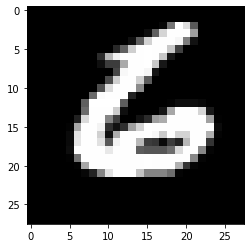

In [52]:
plt.imshow(X[-1].reshape(28,28), cmap='gray');

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=50000, test_size=20000, random_state= 0
)

##### Checking the balanceness of the training data

In [44]:
sum(y_train == '0')

4891

### Preprocessing

In [45]:
X_train.shape

(50000, 784)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train[1]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.47218068e-03, -6.82200089e-03, -1.01338058e-02, -1.27886716e-02,
       -1.41413207e-02, -1.84626087e-02, -2.31695571e-02, -2.90939343e-02,
       -3.14128320e-02, -3.13397345e-02, -3.22310904e-02, -3.07257280e-02,
       -3.02082116e-02, -2.63382717e-02, -2.23822544e-02, -1.79693998e-02,
       -1.55628636e-02, -1.15933390e-02, -9.11949130e-03, -4.79881857e-03,
        0.00000000e+00,  

# Logistic Regression Model Fitting

In [14]:
import warnings
warnings.filterwarnings("ignore")

#### No Regularization

In [15]:
clf = LogisticRegression(penalty='none', tol=0.1, multi_class='ovr')
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100

#y_hat_test = clf.predict(X_test)
score = clf.score(X_test, y_test)

print("Sparsity with no penalty: %.2f%%" % sparsity)
print("Test score with no penalty: %.4f" % score)

Sparsity with no penalty: 8.93%
Test score with no penalty: 0.9131


In [50]:
clf.coef_.shape

(10, 784)

### Regularization

### $L_1$

In [54]:
clf = LogisticRegression(C=0.1, penalty="l1", tol=0.1, solver='saga', multi_class='multinomial')
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 12.63%
Test score with L1 penalty: 0.8885


### $L_2$ 

In [18]:
clf = LogisticRegression(C=0.1, penalty="l2", tol=0.1, multi_class='ovr')
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 8.93%
Test score with L1 penalty: 0.9162


In [19]:
from sklearn.metrics import confusion_matrix

y_hat_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_hat_test)
df = pd.DataFrame(cm)
df

,0,1,2,3,4,5,6,7,8,9
0,1962,1,4,4,4,5,9,4,16,3
1,0,2155,14,3,2,7,3,5,20,2
2,13,12,1744,25,31,10,19,27,42,6
3,9,8,57,1832,6,65,10,21,35,26
4,8,5,12,3,1819,7,16,9,17,71
5,16,15,14,66,17,1552,34,9,47,17
6,15,9,16,2,12,40,1886,2,13,1
7,6,8,30,9,21,4,1,1967,6,59
8,19,50,28,46,13,64,18,13,1674,36
9,7,9,4,29,68,22,0,70,16,1732


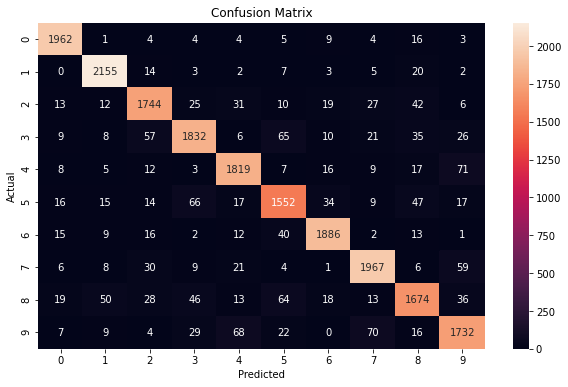

In [20]:
import seaborn as sb

plt.subplots(figsize=(10, 6))
sb.heatmap(confusion_matrix(y_test, y_hat_test), annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()